In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Generate Dataset

In [24]:
x, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

In [25]:
x

array([[-0.43964281,  0.54254734, -0.82241993,  0.40136622, -0.85484   ],
       [ 2.82223116, -2.48085944, -1.14769139, -2.10113103,  3.04027792],
       [ 1.61838572, -1.36947785, -2.08411294, -1.17965857,  1.61360231],
       ...,
       [ 1.56038977, -0.22904063, -0.2344078 , -0.61957623, -1.10985576],
       [ 0.88692467, -0.22294581, -1.3088204 , -0.39617745, -0.40427827],
       [-2.74710392,  1.85043021, -0.19382614,  1.77741855, -1.58083381]])

# Split the DataSet into training and testting sets

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier

In [31]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

# Make prediction on the test set

In [32]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

# calculate the confusion matrix

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[123,  23],
       [ 16, 138]], dtype=int64)

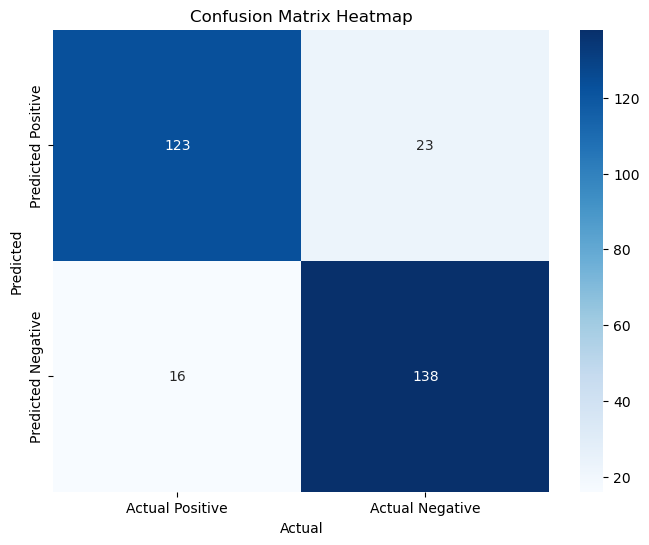

In [46]:
plt.figure(figsize=(8, 6))

# Calculate the confusion matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            yticklabels=['Predicted Positive', 'Predicted Negative'], 
            xticklabels=['Actual Positive', 'Actual Negative'])

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()


# Split the confusion matrix into TP,TN, FP,FN

In [53]:
tp, fp, fn, tn = cm.ravel()

In [54]:
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negayive (FN): {fn}")
print(f"True Negative (TN): {tn}")

True Positive (TP): 123
False Positive (FP): 23
False Negayive (FN): 16
True Negative (TN): 138


# Calculate various performance metrics

In [55]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [57]:
print("Accirecy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 score: ",f1)

Accirecy:  0.87
Precision:  0.8571428571428571
Recall:  0.8961038961038961
F1 score:  0.8761904761904761


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       146
           1       0.86      0.90      0.88       154

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



# Display ROC curve

In [59]:
from sklearn.metrics import RocCurveDisplay

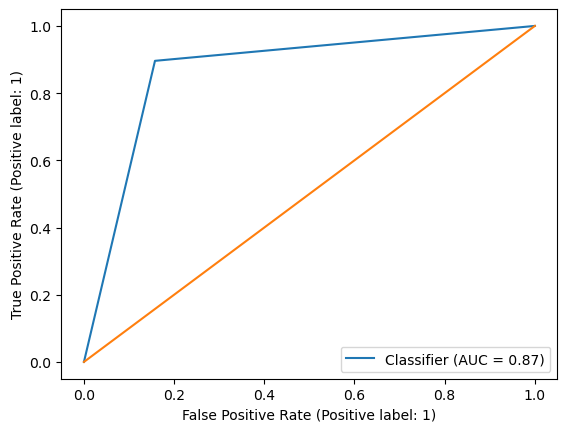

In [72]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()